In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
Athalia_all_peak <- read.table("/clusterfs/jgi/groups/gentech/homes/romalley/full_DAPseq_annotation/raw_data/Athaliana_promoter_gb_integrage.tsv",header = T,sep = "\t",quote = "\"",comment.char="")

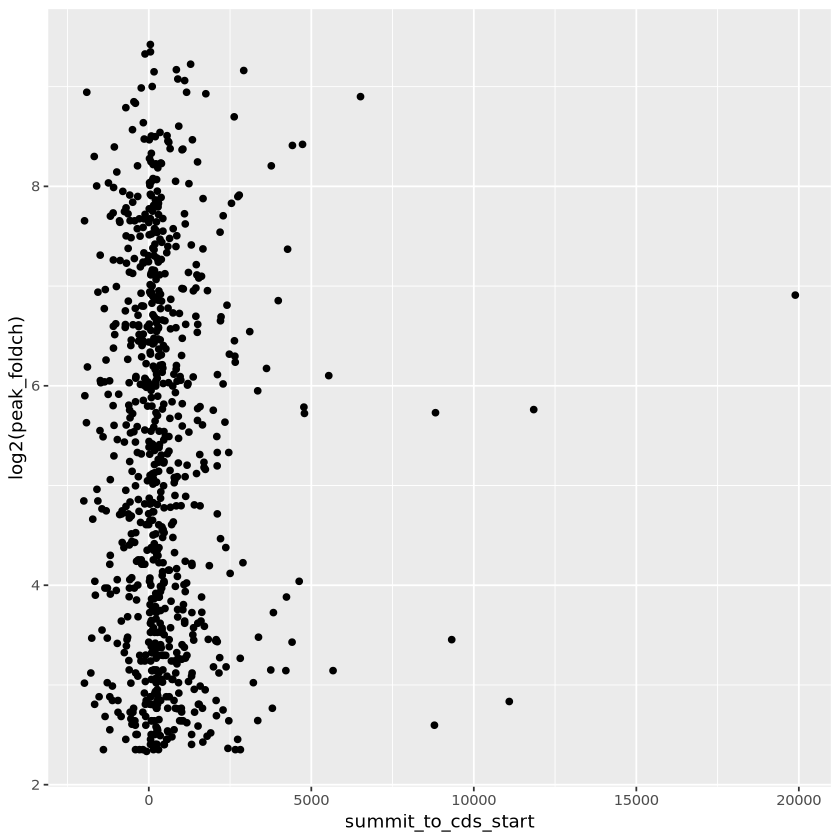

In [7]:
## peak strength versus peak position
TF <- "AT1G01250"
Athalia_all_peak %>% filter(tf==!!TF & n_cons_species_minfrac0==4) %>%
ggplot(aes(x=summit_to_cds_start,y=log2(peak_foldch)))+
geom_point()

In [4]:
gb_anno_table<- read.table("/clusterfs/jgi/groups/gentech/homes/romalley/full_DAPseq_annotation/raw_data/N4_filtered-annotated-peaks_minfoldch5_genebody_plus_500bpStart-to-plus-600bpStop_111924.tsv",
header=T,sep="\t",comment.char="",quote="\"",stringsAsFactors=F)

pro_anno_table<- read.table("/clusterfs/jgi/groups/gentech/homes/romalley/full_DAPseq_annotation/raw_data/N4_filtered-annotated-peaks_minfoldch5_minus-2000bp-to-plus-500bp_111623.tsv",
header=T,sep="\t",comment.char="",quote="\"",stringsAsFactors=F)


In [11]:
data.frame(table(gb_anno_table[gb_anno_table$species=="Arabidopsis_thaliana_Col-0","n_cons_species_minfrac0"]),group="genebody")

Var1,Freq
<fct>,<int>
1,212070
2,244163
3,236421
4,246431


In [ ]:
!awk '{a[substr($9,4,9)]+=$5-$4}END{for(i in a){print i,a[i]}}' ../../../../seqtech/plant_multidap_data/genomes/annotations/Arabidopsis_thaliana_Col-0_cds_primary.gff >Athaliana_cds_length.txt
!awk '{a+=$2-500;b+=2500;}END{print a,b}' Athaliana_cds_length.txt
#19702169 69137500

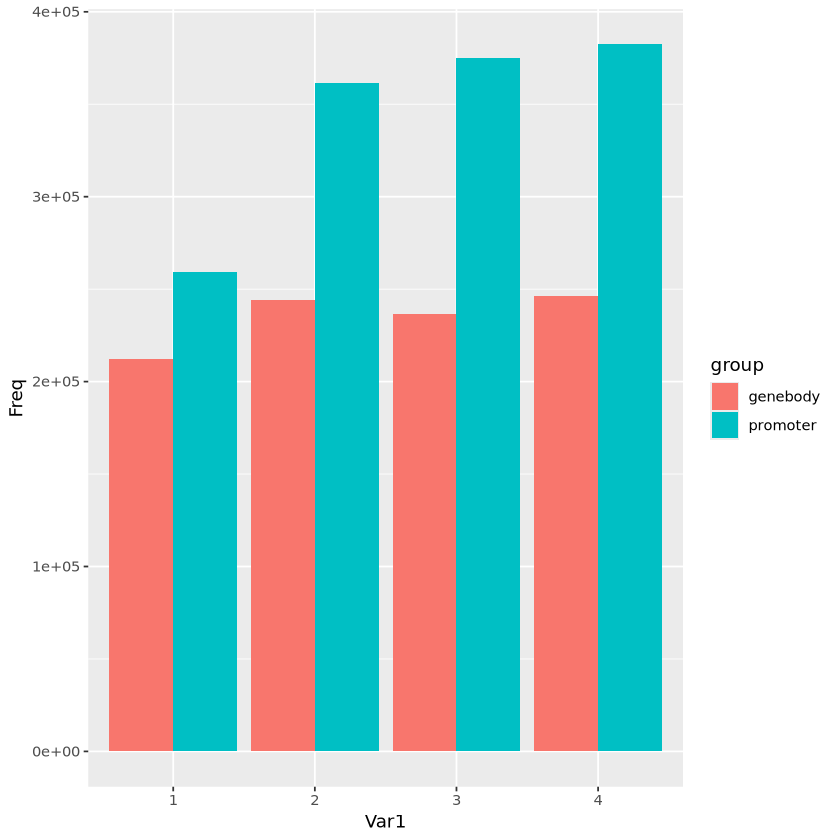

In [15]:
rbind(data.frame(table(pro_anno_table[pro_anno_table$species=="Arabidopsis_thaliana_Col-0","n_cons_species_minfrac0"]),group="promoter"),
data.frame(table(gb_anno_table[gb_anno_table$species=="Arabidopsis_thaliana_Col-0","n_cons_species_minfrac0"]),group="genebody")) %>%
ggplot(aes(x=Var1,y=Freq,fill=group))+
geom_col(position = "dodge")